In [120]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
#create Dataframe object
data=pd.read_csv('pima-indians-diabetes.csv')

In [122]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
1        767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [124]:
data=pd.read_csv("pima-indians-diabetes.csv",names=['No of times pregnant','Plasma glucose concentration','Diastolic blood pressure(mm Hg)',
                 'Triceps skinfold thickness','serum insulin(mu U/ml)','Body mass index','Diabetics pedigree function','Age' ,'Class variable' ])

In [125]:
data.head()

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure(mm Hg),Triceps skinfold thickness,serum insulin(mu U/ml),Body mass index,Diabetics pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
No of times pregnant               768 non-null int64
Plasma glucose concentration       768 non-null int64
Diastolic blood pressure(mm Hg)    768 non-null int64
Triceps skinfold thickness         768 non-null int64
serum insulin(mu U/ml)             768 non-null int64
Body mass index                    768 non-null float64
Diabetics pedigree function        768 non-null float64
Age                                768 non-null int64
Class variable                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Feature Engineering

In [127]:
data.isna().sum()

No of times pregnant               0
Plasma glucose concentration       0
Diastolic blood pressure(mm Hg)    0
Triceps skinfold thickness         0
serum insulin(mu U/ml)             0
Body mass index                    0
Diabetics pedigree function        0
Age                                0
Class variable                     0
dtype: int64

## Feature Selection

In [128]:
data.columns

Index(['No of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure(mm Hg)', 'Triceps skinfold thickness',
       'serum insulin(mu U/ml)', 'Body mass index',
       'Diabetics pedigree function', 'Age', 'Class variable'],
      dtype='object')

In [129]:
X=data.drop('Class variable',axis=1)
y=data['Class variable']
#X.head()
y.shape






(768,)

In [130]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64>

In [131]:
import seaborn as sns

In [132]:
#Finding correlation between features
corr=X.corr()
corr.shape

(8, 8)

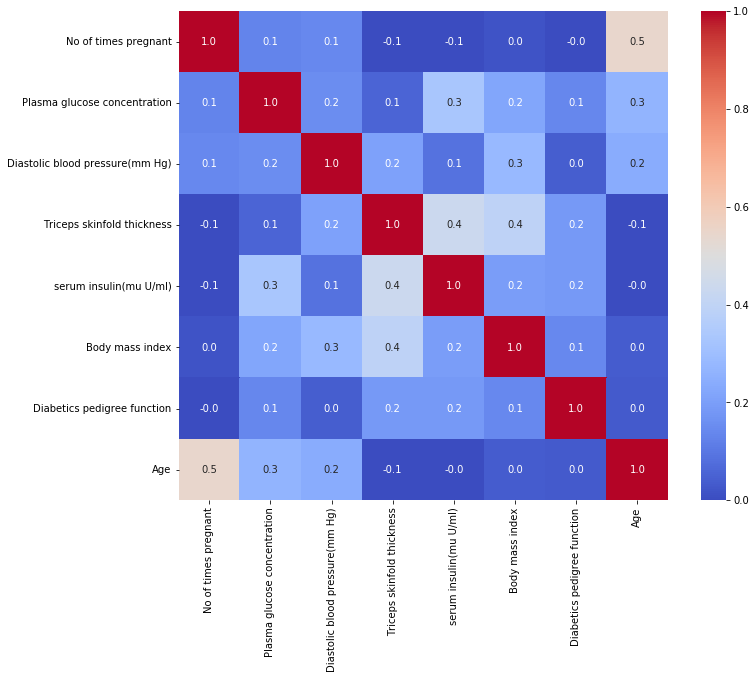

In [133]:
# plotting heatmap of correlation between features
plt.figure(figsize=(12,9))
sns.heatmap(corr,vmin=0,vmax=1,annot=True,fmt=".1f",cmap='coolwarm',cbar= True,square= True)
plt.show()

In [134]:
#with the following features we can find highly correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [135]:
corr_features=correlation(X,.4)
corr_features

{'Age', 'serum insulin(mu U/ml)'}

In [136]:
X_new=X.drop(corr_features,axis=1)
X_new

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure(mm Hg),Triceps skinfold thickness,Body mass index,Diabetics pedigree function
0,6,148,72,35,33.6,0.627
1,1,85,66,29,26.6,0.351
2,8,183,64,0,23.3,0.672
3,1,89,66,23,28.1,0.167
4,0,137,40,35,43.1,2.288
5,5,116,74,0,25.6,0.201
6,3,78,50,32,31.0,0.248
7,10,115,0,0,35.3,0.134
8,2,197,70,45,30.5,0.158
9,8,125,96,0,0.0,0.232


 ## spilt into training and testing dataset

In [137]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.30,random_state=1)
y_test.shape


(231,)

 ## Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_new_train,y_train)
predicted_naive=naive.predict(X_new_test)


In [139]:
import sklearn.metrics as metrics
cm_naive=metrics.confusion_matrix(y_test,predicted_naive)

accuracy_naive=metrics.accuracy_score(y_test,predicted_naive)
print(accuracy_naive)

0.7835497835497836


In [140]:
#print confusioin matrix
print(cm_naive)

[[128  18]
 [ 32  53]]


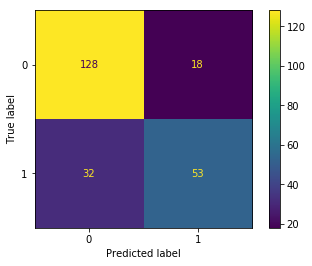

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_naive=ConfusionMatrixDisplay(cm_naive,display_labels=['0','1'])
cmd_naive.plot()

In [142]:
#print precision,recall ,f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



[[7.12533997e-01 2.87466003e-01]
 [7.81094579e-01 2.18905421e-01]
 [9.21398913e-01 7.86010866e-02]
 [9.65519996e-01 3.44800043e-02]
 [8.36548013e-01 1.63451987e-01]
 [8.21859891e-01 1.78140109e-01]
 [8.11826800e-01 1.88173200e-01]
 [9.43850826e-01 5.61491744e-02]
 [8.83397441e-01 1.16602559e-01]
 [8.04137439e-01 1.95862561e-01]
 [4.93798114e-01 5.06201886e-01]
 [9.56582309e-01 4.34176910e-02]
 [9.76863937e-06 9.99990231e-01]
 [2.61068564e-01 7.38931436e-01]
 [6.87911834e-01 3.12088166e-01]
 [2.32916358e-01 7.67083642e-01]
 [8.59806334e-01 1.40193666e-01]
 [8.25770209e-01 1.74229791e-01]
 [4.74772645e-01 5.25227355e-01]
 [9.00956368e-01 9.90436320e-02]
 [6.76589277e-01 3.23410723e-01]
 [8.34478977e-01 1.65521023e-01]
 [2.44737129e-03 9.97552629e-01]
 [7.78956959e-01 2.21043041e-01]
 [9.61344026e-01 3.86559743e-02]
 [7.56531766e-01 2.43468234e-01]
 [7.64530481e-01 2.35469519e-01]
 [1.71230305e-01 8.28769695e-01]
 [9.17503484e-01 8.24965159e-02]
 [4.78345405e-01 5.21654595e-01]
 [6.489557

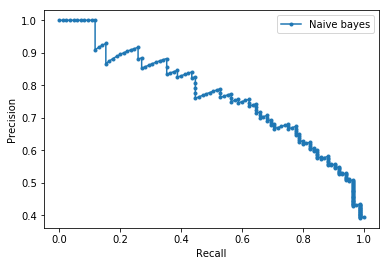

In [143]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
naive_probs = naive.predict_proba(X_new_test)
print(naive_probs)
# keep probabilities for the positive outcome only
naive_probs = naive_probs[:, 1]
# predict class values
predicted_naive = naive.predict(X_new_test)
naive_precision, naive_recall, _ = precision_recall_curve(y_test, naive_probs)
naive_f1, naive_auc = f1_score(y_test, predicted_naive), auc(naive_recall, naive_precision)
# summarize scores
#print('Naive Bayes: f1=%.3f auc=%.3f' % (naive_f1, naive_auc))
# plot the precision-recall curves
plt.plot(naive_recall, naive_precision, marker='.', label='Naive bayes')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


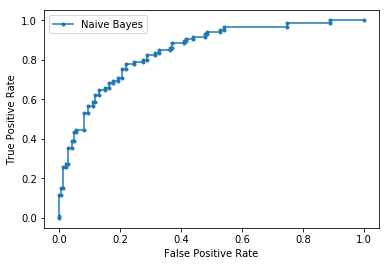

In [144]:
# calculate roc curves
from sklearn.metrics import roc_curve
naive_fpr, naive_tpr, _ = roc_curve(y_test, naive_probs)
# plot the roc curve for the model
plt.plot(naive_fpr, naive_tpr, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


## K-nearest neighbor

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_new_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [146]:
predicted_knn=knn.predict(X_new_test)

In [147]:
import sklearn.metrics as metrics
cm_knn=metrics.confusion_matrix(y_test,predicted_knn)
accuracy_knn=metrics.accuracy_score(y_test,predicted_knn)
print(accuracy_knn)

0.7662337662337663


In [148]:
#print confusion matrix
print(cm_knn)

[[134  12]
 [ 42  43]]


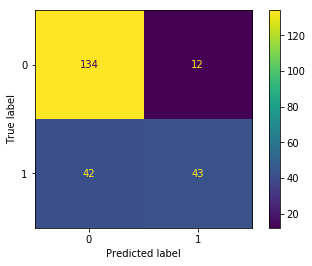

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_knn=ConfusionMatrixDisplay(cm_knn,display_labels=['0','1'])
cmd_knn.plot()

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_knn))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       146
           1       0.78      0.51      0.61        85

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.75       231



[[0.54545455 0.45454545]
 [0.63636364 0.36363636]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [0.72727273 0.27272727]
 [0.72727273 0.27272727]
 [0.36363636 0.63636364]
 [0.72727273 0.27272727]
 [0.72727273 0.27272727]
 [0.63636364 0.36363636]
 [0.63636364 0.36363636]
 [1.         0.        ]
 [0.27272727 0.72727273]
 [0.36363636 0.63636364]
 [0.90909091 0.09090909]
 [0.36363636 0.63636364]
 [0.72727273 0.27272727]
 [0.72727273 0.27272727]
 [0.72727273 0.27272727]
 [1.         0.        ]
 [0.45454545 0.54545455]
 [1.         0.        ]
 [0.36363636 0.63636364]
 [0.81818182 0.18181818]
 [1.         0.        ]
 [0.63636364 0.36363636]
 [0.81818182 0.18181818]
 [0.09090909 0.90909091]
 [0.72727273 0.27272727]
 [0.54545455 0.45454545]
 [0.63636364 0.36363636]
 [0.72727273 0.27272727]
 [1.         0.        ]
 [0.09090909 0.90909091]
 [0.81818182 0.18181818]
 [0.54545455 0.45454545]
 [1.         0.        ]
 [0.72727273 0.27272727]
 [0.81818182 0.18181818]
 [0.63636364 0.36363636]


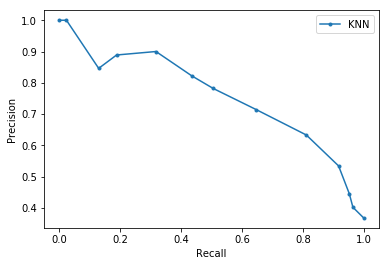

In [151]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
knn_probs = knn.predict_proba(X_new_test)
print(knn_probs)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# predict class values
predicted_knn = knn.predict(X_new_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, predicted_knn), auc(knn_recall, knn_precision)
#summerise scores
print('KNN: f1= %.3f auc= %.3f' %(knn_f1,knn_auc))
# plot the precision-recall curves
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()




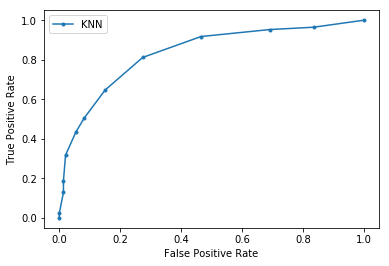

In [152]:
# calculate roc curves
from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


## Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier()
d_tree.fit(X_new_train,y_train)

DecisionTreeClassifier()

In [154]:
predicted_d_tree=d_tree.predict(X_new_test)
#print(predicted_d_tree)
y_test.shape

(231,)

In [155]:
cm_tree=metrics.confusion_matrix(y_test,predicted_d_tree)
accuracy_tree=metrics.accuracy_score(y_test,predicted_d_tree)
print(accuracy_tree)

0.6233766233766234


In [156]:
print(cm_tree)

[[103  43]
 [ 44  41]]


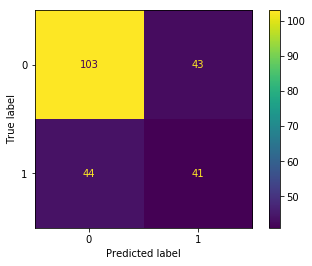

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_tree=ConfusionMatrixDisplay(cm_tree,display_labels=['0','1'])
cmd_tree.plot()

In [158]:
from  sklearn.metrics import classification_report
print(classification_report(y_test,predicted_d_tree))
#plot_classification_report(classification_report(y_test,predicted_d_tree))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       146
           1       0.49      0.48      0.49        85

    accuracy                           0.62       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.62      0.62      0.62       231



## RandomForestClassifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_new_train,y_train)

RandomForestClassifier()

In [160]:
y_test.shape

(231,)

In [161]:
import sklearn.metrics as metrics
predicted_rf=rf.predict(X_new_test)
cm_rf=metrics.confusion_matrix(y_test,predicted_rf)
accuracy_rf=metrics.accuracy_score(y_test,predicted_rf)
print(accuracy_rf)

0.7489177489177489


In [162]:
print(cm_rf)


[[126  20]
 [ 38  47]]


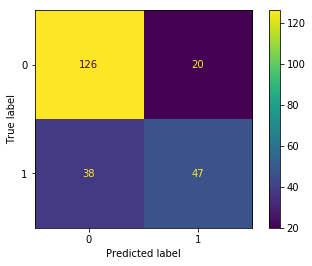

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_rf=ConfusionMatrixDisplay(cm_rf,display_labels=['0','1'])
cmd_rf.plot()

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_rf))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       146
           1       0.70      0.55      0.62        85

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



## Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_new_train,y_train)

LogisticRegression()

In [166]:
predicted_lr=lr.predict(X_new_test)
print(predicted_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [167]:
import sklearn.metrics as metrics
cm_lr=metrics.confusion_matrix(y_test,predicted_lr)
accuracy_lr=metrics.accuracy_score(y_test,predicted_lr)
print(accuracy_lr)

0.7922077922077922


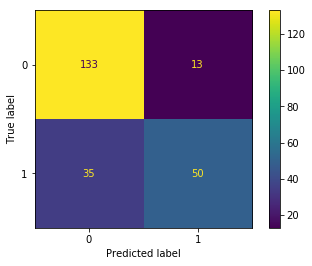

In [168]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_lr=ConfusionMatrixDisplay(cm_lr,display_labels=['0','1'])
cmd_lr.plot()

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_lr))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       146
           1       0.79      0.59      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



## SVM classifer

In [170]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_new_train,y_train)


SVC(kernel='linear')

In [171]:
predicted_svm=clf.predict(X_new_test)
cm_svm=metrics.confusion_matrix(y_test,predicted_svm)
accuracy_svm=metrics.accuracy_score(y_test,predicted_svm)
print(accuracy_svm)

0.7878787878787878


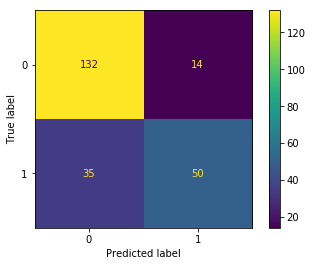

In [172]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd_svm=ConfusionMatrixDisplay(cm_svm,display_labels=['0','1'])
cmd_svm.plot()

In [173]:
print(predicted_svm)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_svm))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

